# <div class="title">Análise de Precipitação na Bacia do Rio Gramame - Estação 14 (2019)</div>


**Neste notebook, será realizada uma análise exploratória dos dados de precipitação coletados em 2019 na estação pluviográfica 14, localizada na bacia hidrográfica do Rio Gramame. A atividade faz parte dos exercícios práticos de programação com Pandas, aplicando conceitos de leitura, processamento e visualização de dados.**


<div class="meta-info">
<p>📚 Disciplina: Programação Python</p>
<p>👨‍🎓 Alunos: Augusto, Thayssa e Mirela</p>
<p>📆 Período: 2025.1</p>
<p>🏫 Universidade Federal da Paraíba</p>
</div>

# _PARTE 1 - LEITURA E PRÉ-PROCESSAMENTO DE DADOS_

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


In [42]:
# Lendo os arquivos brutos e juntando todos em um mesmo dataframe, para análise posterior, utilizando o  módulo glob 
# Para pular as 5 primeiras linhas utilizei SKIPROW=5 e NAMES=[...] para definir o nome das colunas.

csv_files = glob.glob(r'C:\Users\AUGUSTO\Desktop\Trabalho Pluviometros\Dados Brutos\*.csv') # Caminho para os arquivos CSV, usando glob

dfs = [pd.read_csv(file, skiprows=5, names=['id', 'date_str', 'rain_str']) for file in csv_files] # 2. Lê os arquivos e: pula as linhas e adiciona nomes

df_final = pd.concat(dfs, ignore_index=True) # Junta todos os DataFrames em um só, usando concat


In [43]:
df_final.head(15) # conferindo se deu tudo certo, chamando os 15 primeiros resultados

,id,date_str,rain_str
0,1,2018-11-08 09:15:00,0.0 per Logging Interval
1,2,2018-11-08 09:20:00,0.0 per Logging Interval
2,3,2018-11-08 09:25:00,0.0 per Logging Interval
3,4,2018-11-08 09:30:00,0.0 per Logging Interval
4,5,2018-11-08 09:35:00,0.0 per Logging Interval
5,6,2018-11-08 09:40:00,0.0 per Logging Interval
6,7,2018-11-08 09:45:00,0.0 per Logging Interval
7,8,2018-11-08 09:50:00,0.0 per Logging Interval
8,9,2018-11-08 09:55:00,0.0 per Logging Interval
9,10,2018-11-08 10:00:00,0.0 per Logging Interval


In [44]:
# Próximo passo é transformar a coluna DATE_STR de string (cadeia de carateres) para DATETIME

df_final['date_str'] = pd.to_datetime(df_final['date_str'], errors='coerce') #coerce foi uma boa prática que aprendi no passado e passei para as meninas, transforma valores inválidos em NaT (equivalente a NaN para datas), evitando erros.


In [45]:
df_final.dtypes #para saber se a conversão deu certo


id                   int64
date_str    datetime64[ns]
rain_str            object
dtype: object

In [46]:
df_final.info() #Uma boa prática tbm :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160355 entries, 0 to 160354
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        160355 non-null  int64         
 1   date_str  160355 non-null  datetime64[ns]
 2   rain_str  160355 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.7+ MB


In [47]:
# Separando a coluna RAIN_STR. Mas antes, vamos analisar a coluna.

print(df_final['rain_str'].head(20))



0     0.0 per Logging Interval
1     0.0 per Logging Interval
2     0.0 per Logging Interval
3     0.0 per Logging Interval
4     0.0 per Logging Interval
5     0.0 per Logging Interval
6     0.0 per Logging Interval
7     0.0 per Logging Interval
8     0.0 per Logging Interval
9     0.0 per Logging Interval
10    0.0 per Logging Interval
11    0.0 per Logging Interval
12    0.0 per Logging Interval
13    0.0 per Logging Interval
14    0.0 per Logging Interval
15    0.0 per Logging Interval
16    0.0 per Logging Interval
17    0.0 per Logging Interval
18    0.0 per Logging Interval
19    0.0 per Logging Interval
Name: rain_str, dtype: object


In [48]:
# Ficamos um pouco confusos aqui, com esse "LOGGING INTERVAL". Criei uma coluna chuva, com o valores numéricos extraídos de RAIN.STR

df_final['chuva'] = df_final['rain_str'].str.split(' ').str[0].astype(float)


In [49]:
df_final.head(20)

,id,date_str,rain_str,chuva
0,1,2018-11-08 09:15:00,0.0 per Logging Interval,0.0
1,2,2018-11-08 09:20:00,0.0 per Logging Interval,0.0
2,3,2018-11-08 09:25:00,0.0 per Logging Interval,0.0
3,4,2018-11-08 09:30:00,0.0 per Logging Interval,0.0
4,5,2018-11-08 09:35:00,0.0 per Logging Interval,0.0
5,6,2018-11-08 09:40:00,0.0 per Logging Interval,0.0
6,7,2018-11-08 09:45:00,0.0 per Logging Interval,0.0
7,8,2018-11-08 09:50:00,0.0 per Logging Interval,0.0
8,9,2018-11-08 09:55:00,0.0 per Logging Interval,0.0
9,10,2018-11-08 10:00:00,0.0 per Logging Interval,0.0


In [50]:
# Excluir as colunas desnecessárias para nossa análise, RAIN_STR e ID.

df_limpo = df_final.drop(columns=['id', 'rain_str'])



In [51]:
df_limpo.head(15)

,date_str,chuva
0,2018-11-08 09:15:00,0.0
1,2018-11-08 09:20:00,0.0
2,2018-11-08 09:25:00,0.0
3,2018-11-08 09:30:00,0.0
4,2018-11-08 09:35:00,0.0
5,2018-11-08 09:40:00,0.0
6,2018-11-08 09:45:00,0.0
7,2018-11-08 09:50:00,0.0
8,2018-11-08 09:55:00,0.0
9,2018-11-08 10:00:00,0.0


In [52]:
# Renomear as colunas para ‘date_time’ e ‘rain_mm’

df_limpo = df_limpo.rename(columns={'date_str': 'date_time', 'chuva': 'rain_mm'})


In [53]:
df_limpo.head(5)

,date_time,rain_mm
0,2018-11-08 09:15:00,0.0
1,2018-11-08 09:20:00,0.0
2,2018-11-08 09:25:00,0.0
3,2018-11-08 09:30:00,0.0
4,2018-11-08 09:35:00,0.0


In [54]:
# Seguindo os passos pedidos, o próximo passo é transformar a coluna 'RAIN_MM' de string para númerico

df_limpo['rain_mm'] = pd.to_numeric(df_limpo['rain_mm'], errors='coerce')


In [55]:
# Excluir linha duplicadas

df_limpo = df_limpo.drop_duplicates()


In [56]:
# Determinar a precipitação, que será igual ao total de pulsos registrados em 5 minutos vezes a resolução do pluviógrafo, neste caso igual a 0,204 mm/tip;

# A coluna RAIN_STR tinha valores "0.0 PER LOGGING INTERVAL" e extraímos inicialmente para CHUVA. 
# Posteriormente, renomeanos para RAIN_MM. Se ela contém os pulsos a cada 5 minutos, basta realizar uma multiplicação. E no caso, criaremos uma nova coluna.
# Esta coluna chamamos 'PRECIP_MM'

df_limpo['precip_mm'] = df_limpo['rain_mm'] * 0.204




In [57]:
df_limpo.head(15)

,date_time,rain_mm,precip_mm
0,2018-11-08 09:15:00,0.0,0.0
1,2018-11-08 09:20:00,0.0,0.0
2,2018-11-08 09:25:00,0.0,0.0
3,2018-11-08 09:30:00,0.0,0.0
4,2018-11-08 09:35:00,0.0,0.0
5,2018-11-08 09:40:00,0.0,0.0
6,2018-11-08 09:45:00,0.0,0.0
7,2018-11-08 09:50:00,0.0,0.0
8,2018-11-08 09:55:00,0.0,0.0
9,2018-11-08 10:00:00,0.0,0.0


In [58]:
# Excluir os dados dos anos de 2018 e 2020 do dataframe. E renomeando o dataframe para df_filtrado
# O símbolo ~ é o não da expressão. Assim, eu estarei selecionado tudo, exceto os anos 2018 e 2020.
# O .isin verifica se o ano é 2018 ou 2020

df_filtrado = df_limpo[~df_limpo['date_time'].dt.year.isin([2018, 2020])]


In [59]:
df_filtrado.head(10) # As primeiras colunas anteriomente apresentavam o ano de 2018. E sumiram. Sinal que deu certo.

,date_time,rain_mm,precip_mm
15441,2019-01-01 00:00:00,0.0,0.0
15442,2019-01-01 00:05:00,0.0,0.0
15443,2019-01-01 00:10:00,0.0,0.0
15444,2019-01-01 00:15:00,0.0,0.0
15445,2019-01-01 00:20:00,0.0,0.0
15446,2019-01-01 00:25:00,0.0,0.0
15447,2019-01-01 00:30:00,0.0,0.0
15448,2019-01-01 00:35:00,0.0,0.0
15449,2019-01-01 00:40:00,0.0,0.0
15450,2019-01-01 00:45:00,0.0,0.0


In [60]:
# Seguindo : atribuir a coluna ‘date_time’ como index do dataframe

df_filtrado.set_index('date_time', inplace=True)


In [64]:
df_filtrado.head(5)

,rain_mm,precip_mm
date_time,,
2019-01-01 00:00:00,0.0,0.0
2019-01-01 00:05:00,0.0,0.0
2019-01-01 00:10:00,0.0,0.0
2019-01-01 00:15:00,0.0,0.0
2019-01-01 00:20:00,0.0,0.0


# É válido ordenar o data frame pelo índice date_time?

Durante o processamento, o dataframe `df_filtrado` foi construído a partir da união de vários arquivos. Esse processo pode ter deixado as linhas fora de ordem cronológica, mesmo que o índice (`date_time`) esteja em formato de data/hora.

📌 **Por que isso importa?**

1. 📊 **Análises temporais corretas**  
   Vou realizar operações como reamostragem, médias por período (dia, hora, mês), e talvez até janelas móveis (`rolling`). Essas funções precisam que os dados estejam em ordem temporal para gerar resultados coerentes.

2. 🔄 **Evitar inconsistências e erros silenciosos**  
   Mesmo que o índice seja datetime, se ele não estiver ordenado, funções como `resample()`, `rolling()` ou `interpolate()` podem produzir resultados errados — e o pior: sem avisar.

3. 📈 **Visualizações confiáveis**  
   Gráficos baseados no tempo (como linha de chuva ao longo dos dias) exigem que os dados estejam ordenados para serem interpretados corretamente. Caso contrário, a visualização pode parecer “embaralhada” ou “quebrada”.

✅ **Conclusão:**  
Ordenar o `df_filtrado` pelo índice `date_time` é essencial para garantir a integridade das análises e visualizações temporais. Isso assegura que todas as funções que dependem da sequência de tempo operem corretamente.


In [65]:
# Reordenando o dataframe

df_filtrado.sort_index(inplace=True)


In [67]:
df_filtrado.head(10)

,rain_mm,precip_mm
date_time,,
2019-01-01 00:00:00,0.0,0.0
2019-01-01 00:05:00,0.0,0.0
2019-01-01 00:10:00,0.0,0.0
2019-01-01 00:15:00,0.0,0.0
2019-01-01 00:20:00,0.0,0.0
2019-01-01 00:25:00,0.0,0.0
2019-01-01 00:30:00,0.0,0.0
2019-01-01 00:35:00,0.0,0.0
2019-01-01 00:40:00,0.0,0.0



 # _PARTE 2 - VISUALIZAÇÃO DE DADOS_





### *5 em 5 minutos*


In [76]:
df_filtrado.describe()


,rain_mm,precip_mm
count,105120.000000,105120.000000
mean,0.054775,0.011174
std,0.581544,0.118635
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,37.000000,7.548000


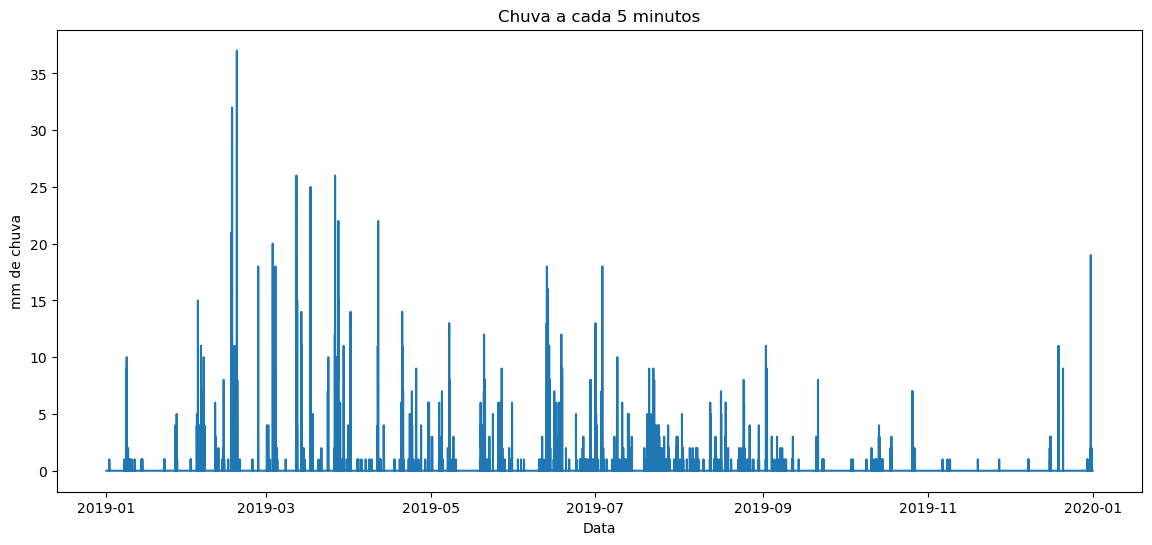

In [77]:
# Gráfico de linha

plt.figure(figsize=(14,6))
plt.plot(df_filtrado.index, df_filtrado['rain_mm'])
plt.title('Chuva a cada 5 minutos')
plt.xlabel('Data')
plt.ylabel('mm de chuva')
plt.show()


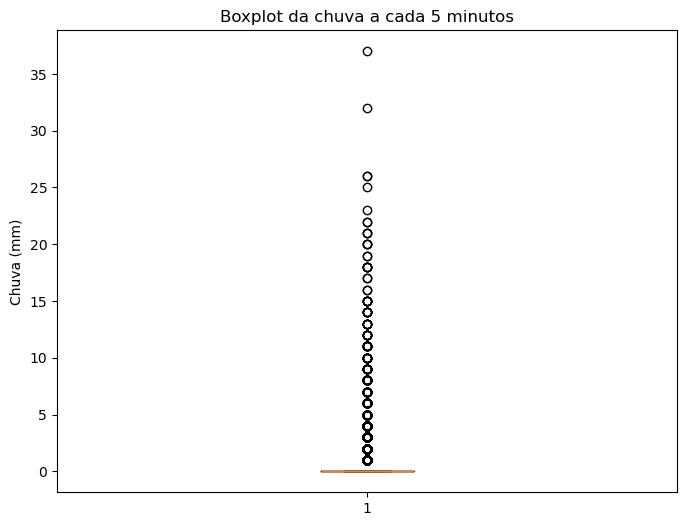

In [78]:
# Gráfico de Boxplot

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(df_filtrado['rain_mm'].dropna())  # dropna para evitar problemas com valores nulos
plt.title('Boxplot da chuva a cada 5 minutos')
plt.ylabel('Chuva (mm)')
plt.show()



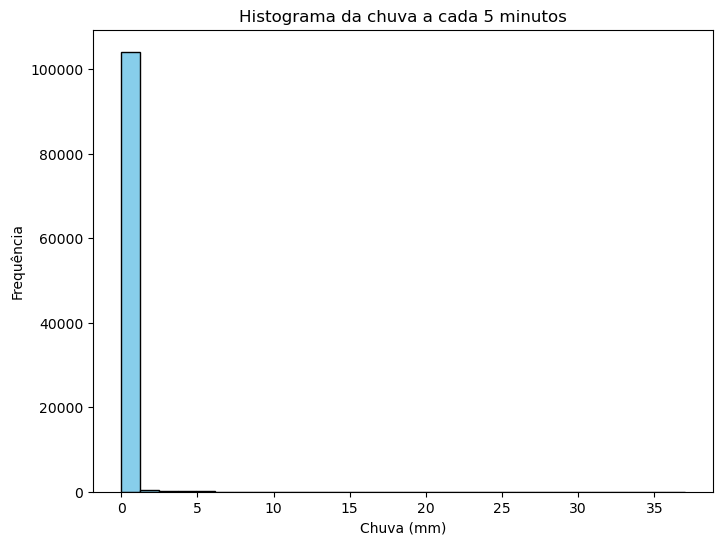

In [79]:
# Gráfico de Histograma

plt.figure(figsize=(8,6))
plt.hist(df_filtrado['rain_mm'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da chuva a cada 5 minutos')
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.show()


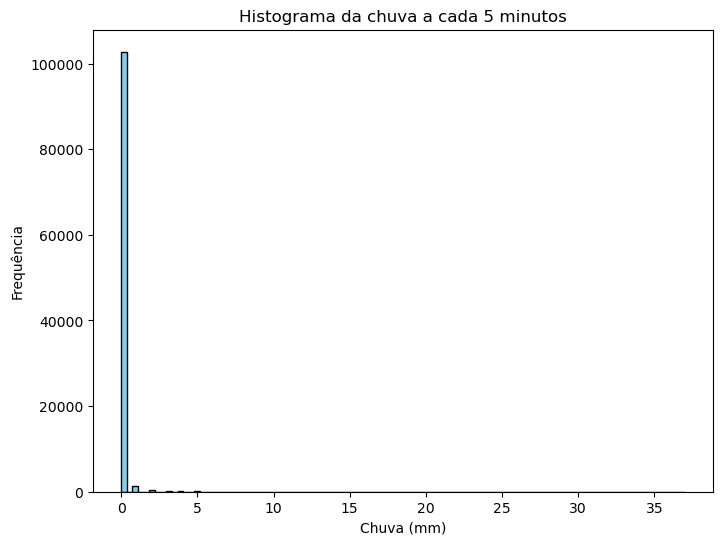

In [80]:
# Ficou estranho esse gráfico. Faz sentido porque a maioria dos valores em rain_mm provavelmente é zero ou muito próxima de zero, gerando uma barra gigantesca no histograma para esses valores baixos. 
# Enquanto os valores maiores são raros e ficam com barras pequenas.

# Vamos ajustar os bins ("recipientes" ou "caixas" usados para agrupar os dados num histograma) para mais:

plt.figure(figsize=(8,6))
plt.hist(df_filtrado['rain_mm'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title('Histograma da chuva a cada 5 minutos')
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.show()


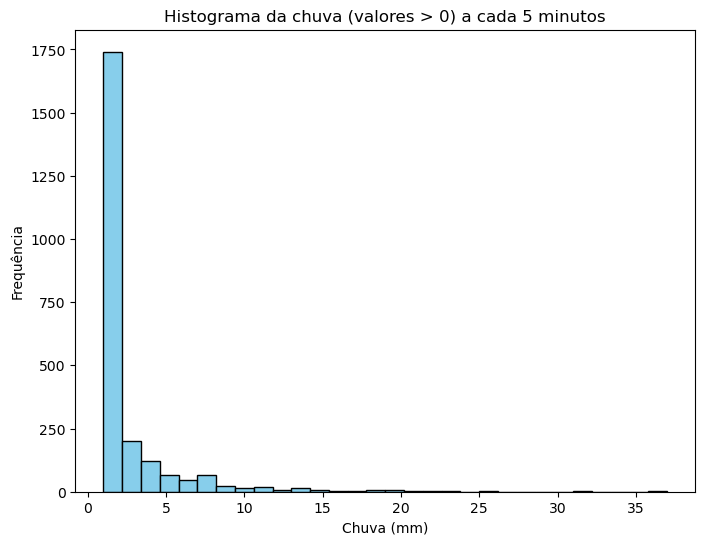

In [81]:
# Ou ainda, excluir os zeros para ver só quando chove mesmo.

plt.figure(figsize=(8,6))
plt.hist(df_filtrado.loc[df_filtrado['rain_mm'] > 0, 'rain_mm'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da chuva (valores > 0) a cada 5 minutos')
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.show()


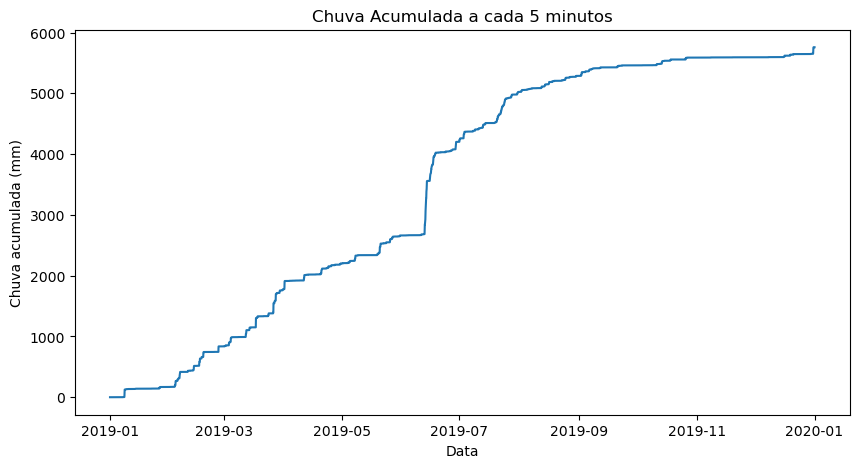

In [90]:
# Chuva acumulada 5 em 5 minutos

chuva_acumulada_5min = df_filtrado['rain_mm'].cumsum()

plt.figure(figsize=(10,5))
plt.plot(df_filtrado.index, chuva_acumulada_5min)
plt.title('Chuva Acumulada a cada 5 minutos')
plt.xlabel('Data')
plt.ylabel('Chuva acumulada (mm)')
plt.show()

### _Dados horários_

In [83]:
df_horario = df_filtrado.resample('h').sum()

In [84]:
df_horario.describe()

,rain_mm,precip_mm
count,8760.000000,8760.000000
mean,0.657306,0.134090
std,4.507193,0.919467
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,129.000000,26.316000


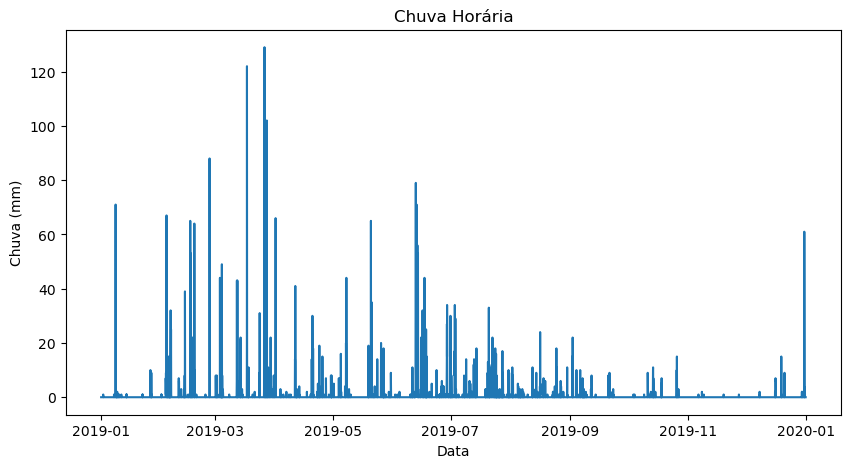

In [85]:
# Gráfico de linha

plt.figure(figsize=(10,5))
plt.plot(df_horario.index, df_horario['rain_mm'])
plt.title('Chuva Horária')
plt.xlabel('Data')
plt.ylabel('Chuva (mm)')
plt.show()


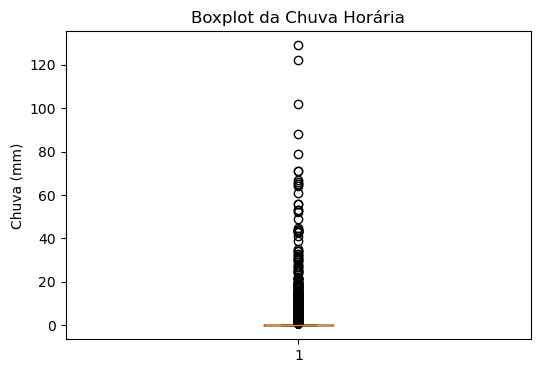

In [86]:
# Gráfico boxplot

plt.figure(figsize=(6,4))
plt.boxplot(df_horario['rain_mm'])
plt.title('Boxplot da Chuva Horária')
plt.ylabel('Chuva (mm)')
plt.show()


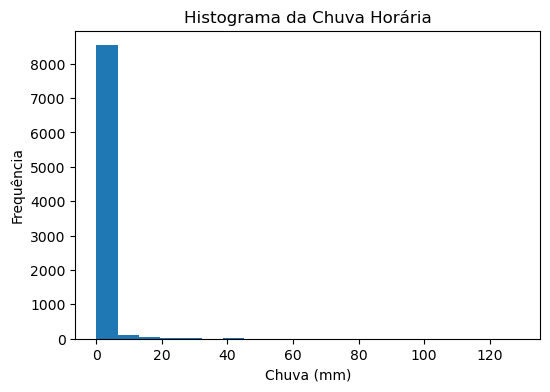

In [87]:
# Gráfico histograma

plt.figure(figsize=(6,4))
plt.hist(df_horario['rain_mm'], bins=20)
plt.title('Histograma da Chuva Horária')
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.show()


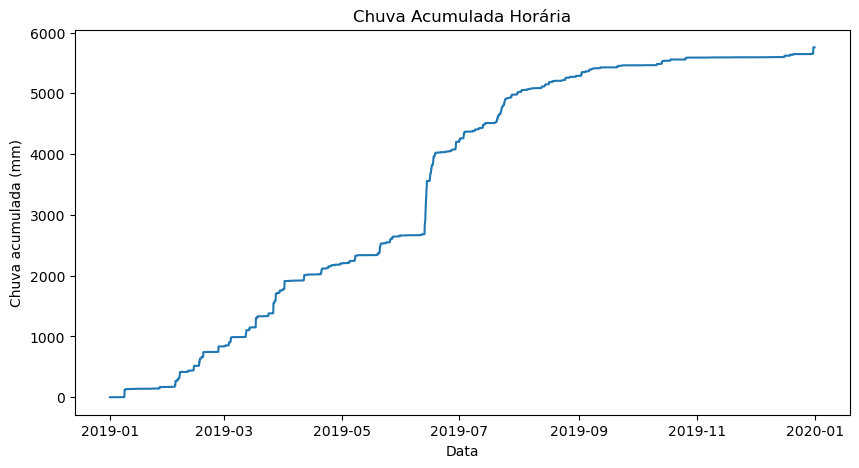

In [88]:
# Chuva acumulado horária

chuva_acumulada_horaria = df_horario['rain_mm'].cumsum()
plt.figure(figsize=(10,5))
plt.plot(df_horario.index, chuva_acumulada_horaria)
plt.title('Chuva Acumulada Horária')
plt.xlabel('Data')
plt.ylabel('Chuva acumulada (mm)')
plt.show()

### _Dados Diários_

In [91]:
df_diario = df_filtrado.resample('d').sum()

In [92]:
df_diario.describe()

,rain_mm,precip_mm
count,365.000000,365.000000
mean,15.775342,3.218170
std,47.032417,9.594613
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.204000
75%,11.000000,2.244000
max,692.000000,141.168000


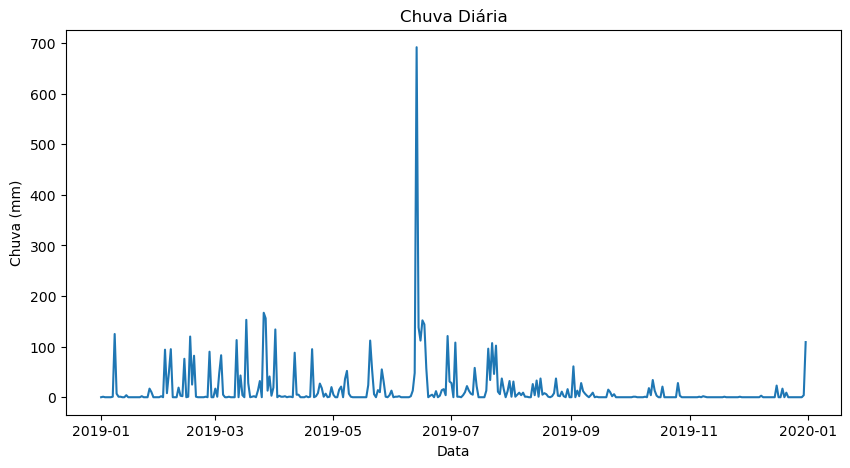

In [93]:
# Gráfico de linha

plt.figure(figsize=(10,5))
plt.plot(df_diario.index, df_diario['rain_mm'])
plt.title('Chuva Diária')
plt.xlabel('Data')
plt.ylabel('Chuva (mm)')
plt.show()


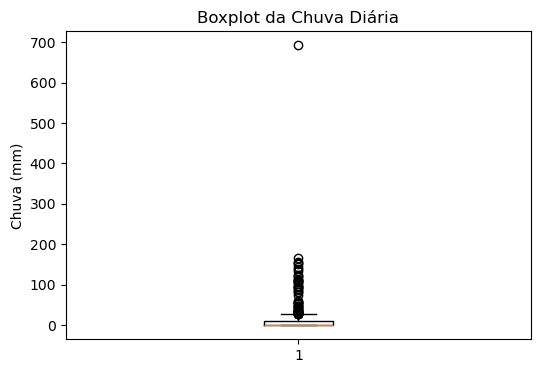

In [94]:
# Gráfico boxplot

plt.figure(figsize=(6,4))
plt.boxplot(df_diario['rain_mm'])
plt.title('Boxplot da Chuva Diária')
plt.ylabel('Chuva (mm)')
plt.show()

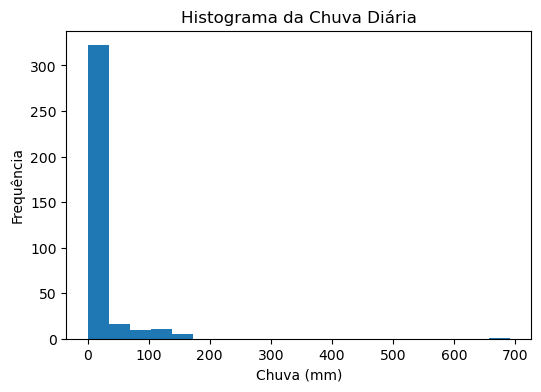

In [95]:
# Gráfico histograma

plt.figure(figsize=(6,4))
plt.hist(df_diario['rain_mm'], bins=20)
plt.title('Histograma da Chuva Diária')
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.show()

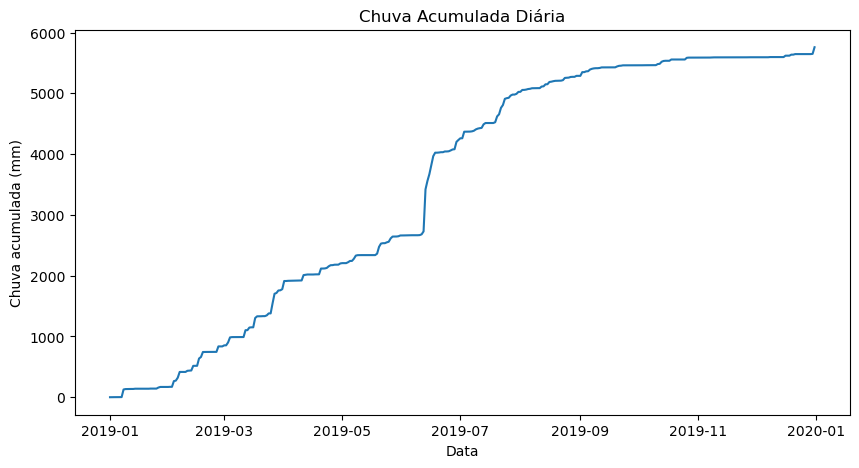

In [96]:
# Chuva acumulada diária

chuva_acumulada_diaria = df_diario['rain_mm'].cumsum()

plt.figure(figsize=(10,5))
plt.plot(df_diario.index, chuva_acumulada_diaria)
plt.title('Chuva Acumulada Diária')
plt.xlabel('Data')
plt.ylabel('Chuva acumulada (mm)')
plt.show()

### _Dados Mensais_

In [99]:
df_mensal = df_filtrado.resample('ME').sum()

In [100]:
df_mensal.describe()

,rain_mm,precip_mm
count,12.000000,12.000000
mean,479.833333,97.886000
std,449.767583,91.752587
min,6.000000,1.224000
25%,168.000000,34.272000
50%,343.500000,70.074000
75%,698.000000,142.392000
max,1571.000000,320.484000


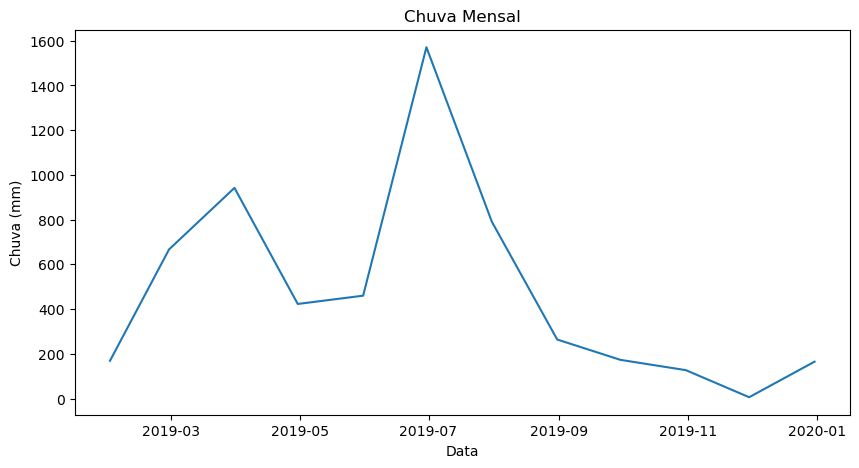

In [101]:
# Gráfico de linha 

plt.figure(figsize=(10,5))
plt.plot(df_mensal.index, df_mensal['rain_mm'])
plt.title('Chuva Mensal')
plt.xlabel('Data')
plt.ylabel('Chuva (mm)')
plt.show()



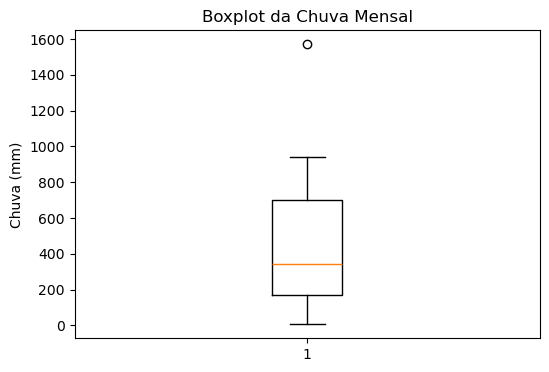

In [102]:
# Gráfico Boxplot

plt.figure(figsize=(6,4))
plt.boxplot(df_mensal['rain_mm'])
plt.title('Boxplot da Chuva Mensal')
plt.ylabel('Chuva (mm)')
plt.show()

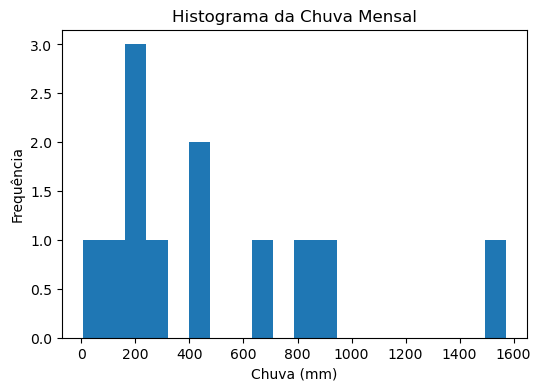

In [103]:
# Gráfico Histograma

plt.figure(figsize=(6,4))
plt.hist(df_mensal['rain_mm'], bins=20)
plt.title('Histograma da Chuva Mensal')
plt.xlabel('Chuva (mm)')
plt.ylabel('Frequência')
plt.show()

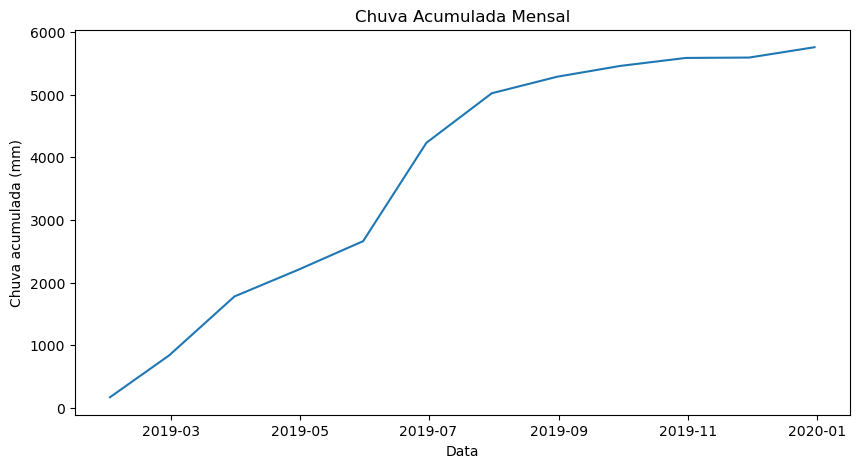

In [104]:
# Chuva acumulada mensal

chuva_acumulada_mensal = df_mensal['rain_mm'].cumsum()
plt.figure(figsize=(10,5))
plt.plot(df_mensal.index, chuva_acumulada_mensal)
plt.title('Chuva Acumulada Mensal')
plt.xlabel('Data')
plt.ylabel('Chuva acumulada (mm)')
plt.show()

# Conclusões finais

<div style="background-color: #1e1e2f; border: 2px solid #4A90E2; border-radius: 12px; padding: 25px; color: #f4f4f4; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 18px; line-height: 1.6;">

<h2 style="color: #6FB1FC;">📊 Conclusões Finais da Análise Estatística de Precipitação</h2>

<p>Esta análise teve como foco avaliar o comportamento da chuva em diferentes escalas de tempo (⏱️ 5 minutos, ⏰ horária, 📆 diária e 🗓️ mensal), com base em parâmetros estatísticos e gráficos descritivos.</p>

<hr style="border-top: 1px solid #4A90E2;">

<h3 style="color: #6FB1FC;">🕔 Intervalos de 5 em 5 minutos</h3>
<ul>
  <li>Média: <strong>0.054 mm</strong> | Desvio padrão: <strong>0.58 mm</strong></li>
  <li>⚠️ <strong>75% dos registros foram zero</strong>, o que evidencia a baixa frequência de chuva.</li>
  <li>🌧️ Pico de chuva intenso: <strong>37 mm</strong> em apenas 5 minutos!</li>
  <li>📉 <strong>Boxplot repleto de outliers</strong> e achatado — pouca variabilidade e muitos extremos. <br>👉 <span style="color: #FF6B6B;">Essa escala pode não ser a ideal para análise estatística detalhada</span>.</li>
</ul>

<hr style="border-top: 1px solid #4A90E2;">

<h3 style="color: #6FB1FC;">🕐 Dados Horários</h3>
<ul>
  <li>Média: <strong>0.657 mm/h</strong> | Desvio padrão: <strong>4.50 mm</strong></li>
  <li>🌧️ Máximo de <strong>129 mm/h</strong>, indicando picos fortes.</li>
  <li>⚠️ Muitos valores ainda são zero, o que exige cautela na visualização.</li>
</ul>

<hr style="border-top: 1px solid #4A90E2;">

<h3 style="color: #6FB1FC;">📅 Dados Diários</h3>
<ul>
  <li>Média: <strong>15.77 mm/dia</strong> | Desvio padrão: <strong>47.03 mm</strong></li>
  <li>📌 Mediana: <strong>1.0 mm</strong>, mas máximo chega a <strong>692 mm</strong> — uma grande variação entre dias secos e chuvosos.</li>
  <li>📈 <strong>Boxplot começa a se tornar mais representativo</strong> e informativo.</li>
</ul>

<hr style="border-top: 1px solid #4A90E2;">

<h3 style="color: #6FB1FC;">🗓️ Dados Mensais</h3>
<ul>
  <li>Média: <strong>479.83 mm/mês</strong> | Desvio padrão: <strong>449.76 mm</strong></li>
  <li>📊 Melhor distribuição dos dados: menos zeros, mais tendência e padrão.</li>
  <li>🌧️ Máximo: <strong>1571 mm</strong> em um mês!</li>
</ul>

<hr style="border-top: 1px solid #4A90E2;">

<h3 style="color: #6FB1FC;">🧠 Conclusão Geral</h3>
<ul>
  <li>Escalas menores (<strong>5 min / hora</strong>) são dominadas por zeros e outliers → dificultam a análise.</li>
  <li>Escalas maiores (<strong>diária / mensal</strong>) oferecem <strong>melhor distribuição</strong> e <strong>mais confiabilidade estatística</strong>.</li>
  <li>⚙️ O uso de <code>resample().sum()</code> foi essencial para acumular corretamente os totais de chuva por período.</li>
  <li>📌 Para futuras análises ou modelos, recomenda-se trabalhar com dados <strong>diários ou mensais</strong>.</li>
</ul>

<p style="margin-top: 20px; font-size: 16px; color: #ccc;">✔️ Esta análise é fundamental para compreender padrões de chuva, identificar eventos extremos e embasar decisões em climatologia, gestão hídrica e engenharia ambiental.</p>

</div>


# Consideração final

<h3 style="color: #6FB1FC;">🧠 Considerações sobre os Gráficos Boxplot</h3>
<p>
Os gráficos boxplot revelaram uma alta quantidade de <strong>outliers</strong> especialmente nas escalas de tempo menores (5 min e hora), o que <strong>prejudica sua utilidade como ferramenta de análise visual</strong> nessas situações. Isso ocorre porque a <strong>distribuição é extremamente assimétrica</strong> e concentrada em zero, com poucos pontos representando chuvas intensas. <br><br>
🟡 <em>Portanto, o uso do boxplot pode não ser o mais adequado para representar os dados de precipitação em escalas curtas. Escalas maiores, como a diária e principalmente a mensal, resultam em boxplots mais estáveis, com menos distorções visuais e maior capacidade de representar a realidade dos dados.</em>
</p>